In [307]:
from matplotlib import pyplot as plt
from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from sklearn.metrics import mean_squared_error
from pandas.plotting import autocorrelation_plot
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import mean_squared_error 

import numpy as np
from pandas.plotting import lag_plot
import pandas as pd
from math import floor
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
import itertools
import sys
%matplotlib inline

In [308]:
from timeit import default_timer as timer

In [309]:
sys.path.append('../libraries/')

In [310]:
from signalgen import *
from combine_test import test_different_frequencies_waves
from combine_test import test_different_amplitudes_waves
from combine_test import test_different_freq_amp_waves

In [311]:
sample_rate = 41000
frequency = 3
amplitude = 100
duration_in_seconds = 3
x, y = sine_wave(sample_rate, duration_in_seconds, frequency, amplitude)

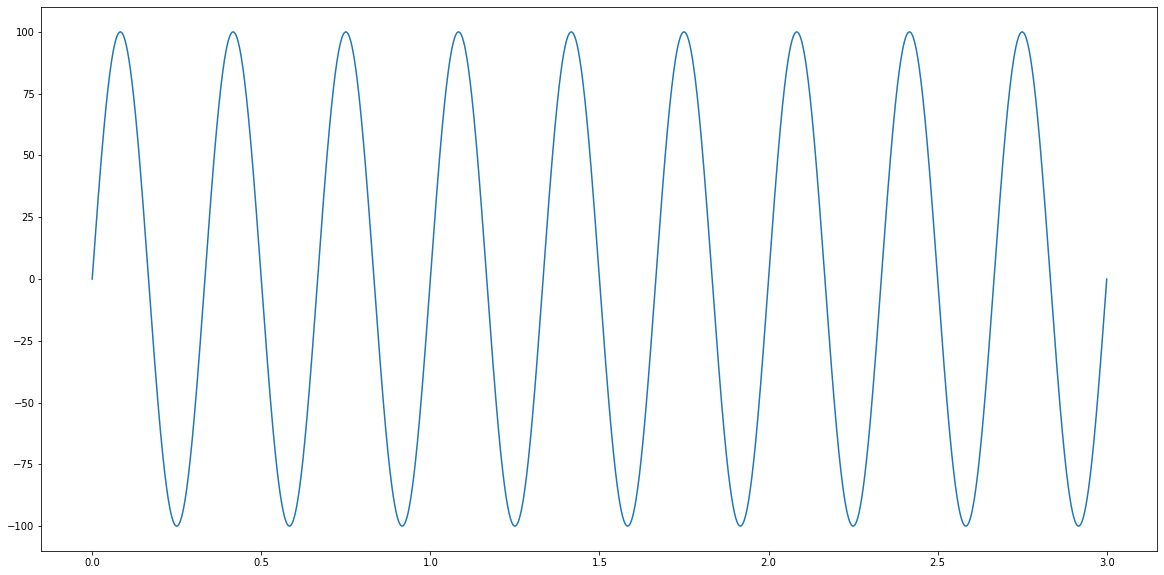

In [312]:
plt.figure(figsize=(20, 10))
plt.plot(x,y)
plt.savefig('sine.png')

In [313]:
from statsmodels.graphics.tsaplots import plot_acf

<Figure size 1440x720 with 0 Axes>

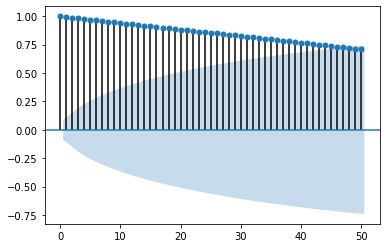

In [314]:
plt.figure(figsize=(20,10))
plot_acf(pd.Series(y[-512:]), lags = 50, title = "")
plt.savefig('autocorrelation_plot_80lag.png')

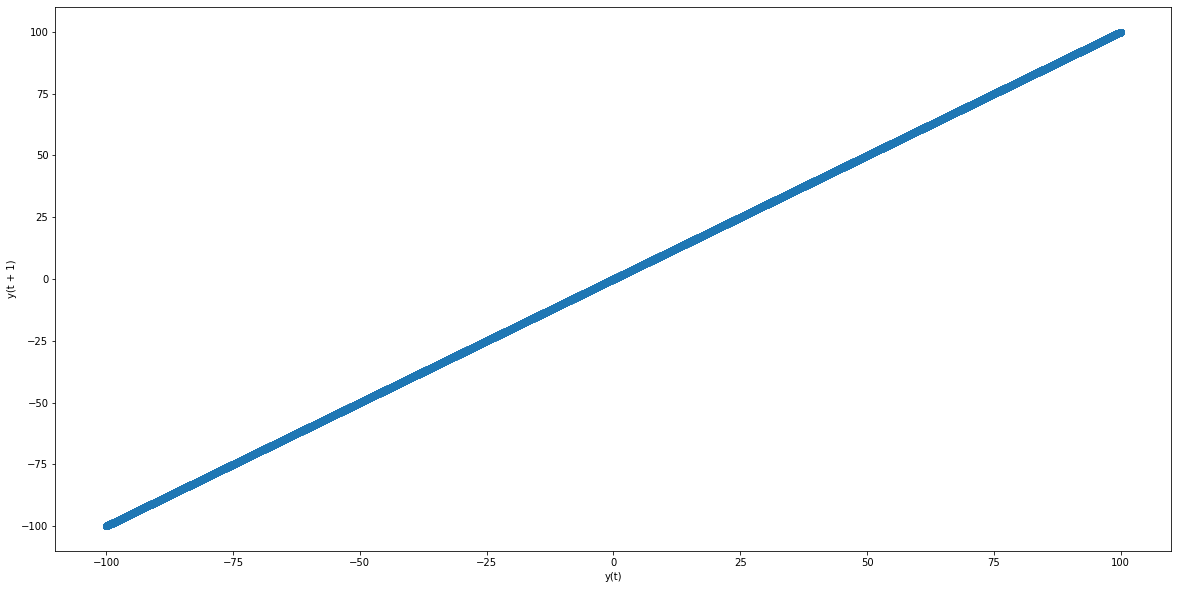

In [315]:
from pandas.plotting import lag_plot

plt.figure(figsize=(20,10))
lag_plot(pd.Series(y))
plt.savefig('lag-plot.png')

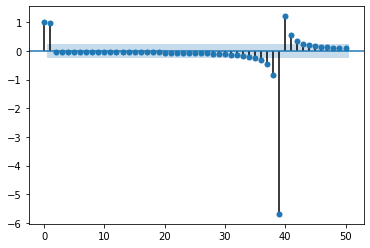

In [190]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(pd.Series(y[-65:]), lags=50, title = "")
plt.savefig('pacf_50lag.png')

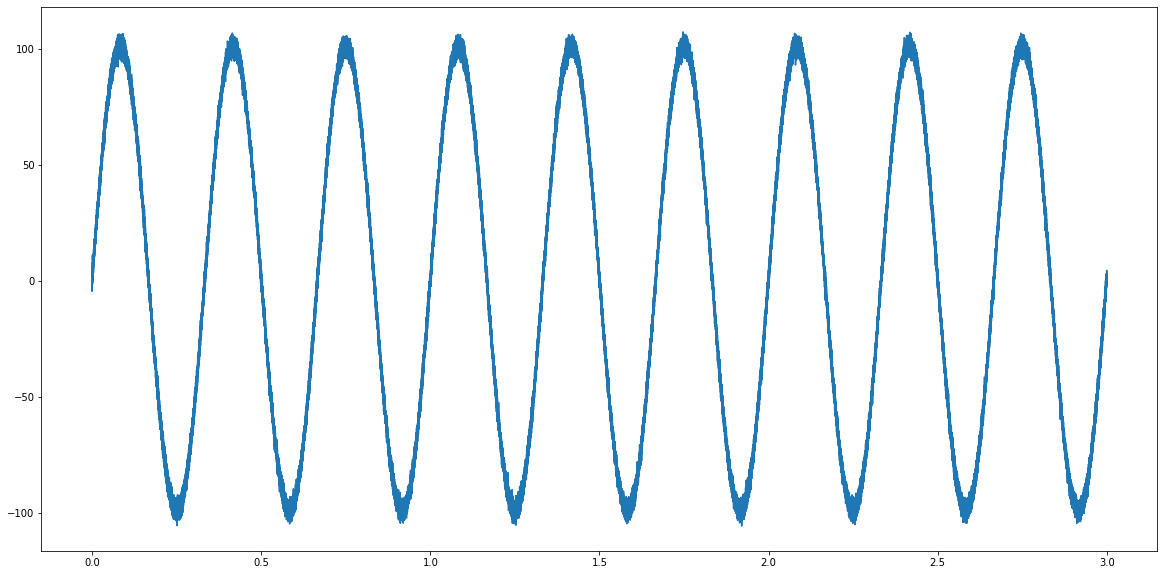

In [77]:
sample_rate = 44100
frequency = 3
amplitude = 100
duration_in_seconds = 3
x, y = sine_wave_noisy(sample_rate, duration_in_seconds, frequency, amplitude, 1, 2.0)
plt.figure(figsize=(20, 10))
plt.plot(x,y)

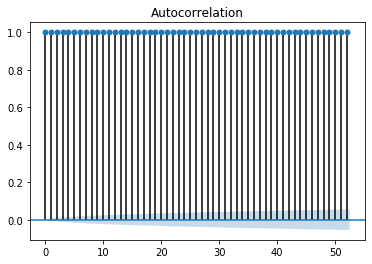

In [78]:
plot_acf(y)
plt.show()

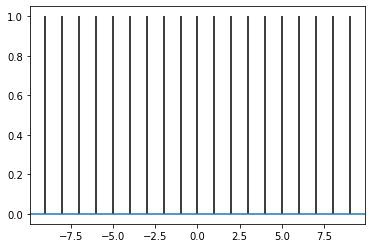

In [79]:
plt.acorr(y, maxlags=9)
plt.show()

# Basic test

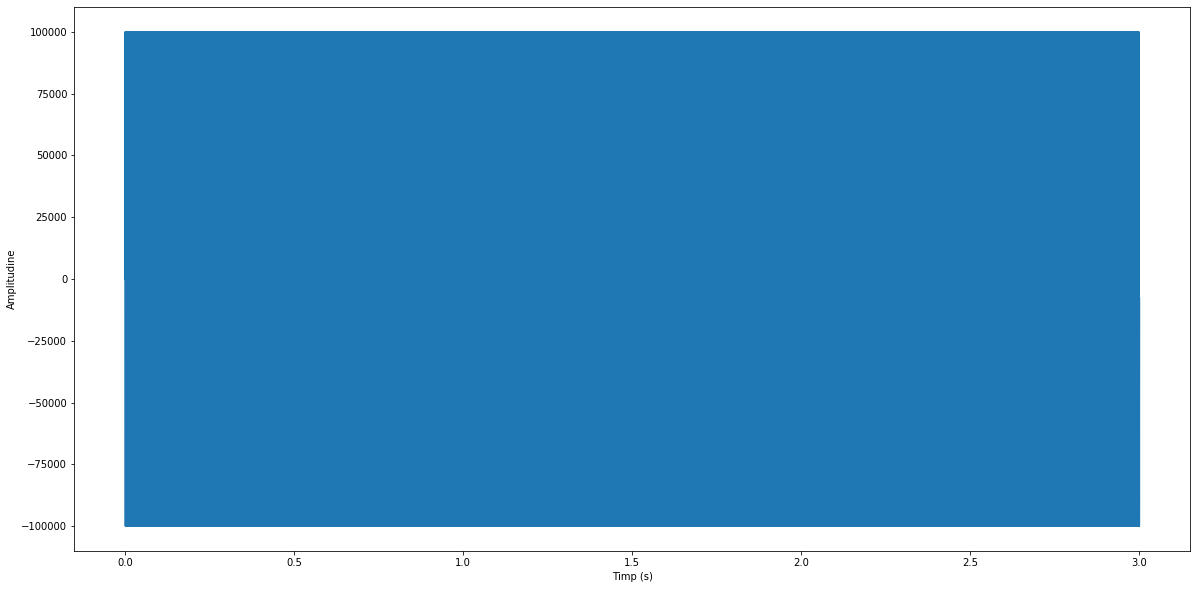

In [338]:
sample_rate = 44100
frequency = 550
amplitude = 100000
duration_in_seconds = 3
x, y = sine_wave(sample_rate, duration_in_seconds, frequency, amplitude)
plt.figure(figsize=(20, 10))
plt.xlabel('Timp (s)')
plt.ylabel('Amplitudine')
plt.plot(x,y)

In [339]:
specs = {
    'Rată de eșantionare': sample_rate,
    'Frecvență': frequency,
    'Amplitudine': amplitude,
    'Durata în secunde': duration_in_seconds 
}
specs_df = pd.DataFrame([specs], columns = ['Rată de eșantionare', 'Frecvență', 'Amplitudine', 'Durata în secunde'])

In [340]:
specs_df

Rată de eșantionare  Frecvență  Amplitudine  Durata în secunde
0                44100        550       100000                  3

In [341]:
train, test = y[1:len(y)-1024], y[len(y)-1024:]

In [342]:
len(train)

131275

In [343]:
len(test)

1024

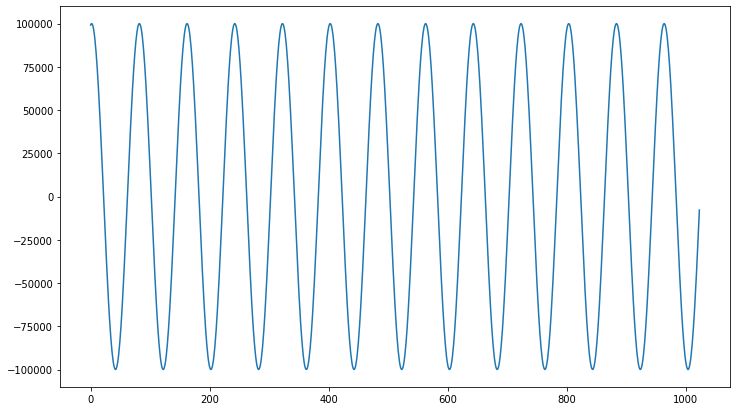

In [344]:
plt.plot(test)

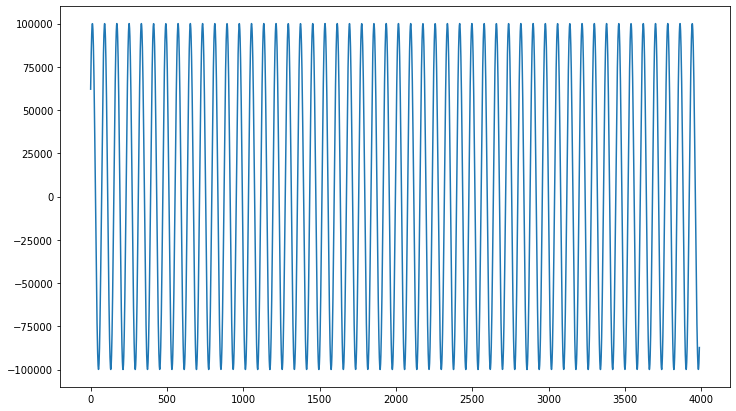

In [345]:
plt.plot(train[-4500:-512])

0.00042350000148871914
Fit time: 0.021
Lag: 2
Coefficients: [-2.53976395e-10  1.99386258e+00 -1.00000000e+00]
Prediction time: 0.005
Test MAE: 0.000 
Test RMSE: 0.000


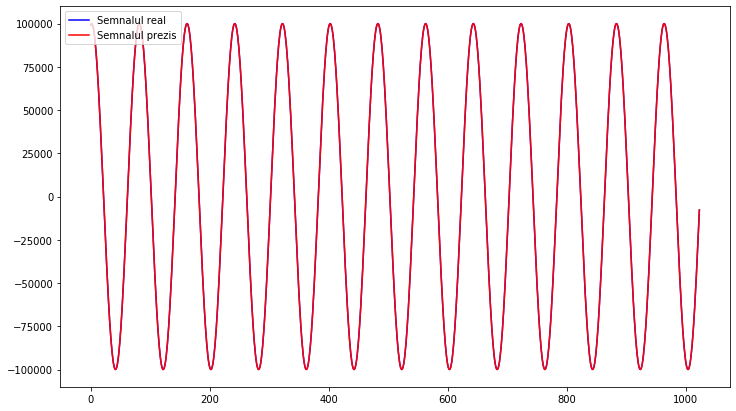

In [355]:
# train autoregression
start = timer()
model = AR(train[-64:])
end = timer()
print(end - start)
start = timer()
model_fit = model.fit(ic='bic')
end = timer()
print('Fit time: %.3f' % (end - start))
print('Lag: %s' % model_fit.k_ar)
print('Coefficients: %s' % model_fit.params)
# make predictions
start = timer()
predictions = model_fit.predict(start=len(train[-64:]), end=len(train[-64:])+len(test)-1, dynamic=False)
end = timer()
print('Prediction time: %.3f' % (end - start))
ame = mean_squared_error(test, predictions)
mse = mean_squared_error(test, predictions)
rmse = np.sqrt(mse)
error = mean_squared_error(test, predictions)
print('Test MAE: %.3f ' % error)
print('Test RMSE: %.3f' % rmse)
# plot results
plt.plot(test, "-b", label="Semnalul real")
plt.plot(predictions, "-r", label="Semnalul prezis")
plt.legend(loc="upper left")
plt.savefig('../test-data/sine_tests/base.png')
plt.show()

In [296]:
def compute_error_values(expected, predictions):
    mae = mean_absolute_error(expected, predictions)
    mse = mean_squared_error(expected, predictions)
    rmse = np.sqrt(mse)
    return mae, mse, rmse

In [297]:
print(compute_error_values(test, predictions))

(1.7758748295417914e-11, 5.292160362729975e-22, 2.3004695961324884e-11)


# Frequency dependant test

## Range-ul [10, 100], la un step de 10.

In [298]:
range_start = 10
range_end = 101
step = 10

Mean absolute error: 0.1987076746341962
Root mean squared error: 0.2519965349576813


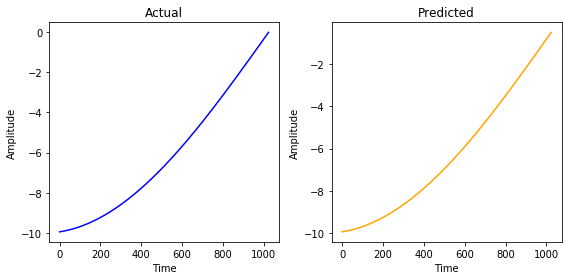

Mean absolute error: 2.9918494479962185
Root mean squared error: 3.7943604014412915


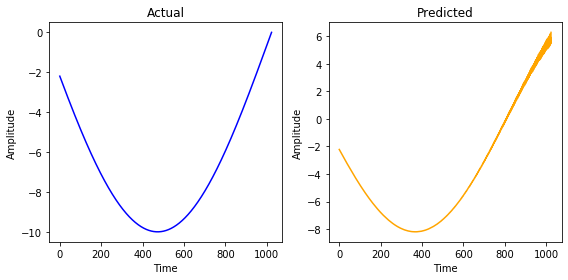

Mean absolute error: 0.2093134507603266
Root mean squared error: 0.2667774749822235


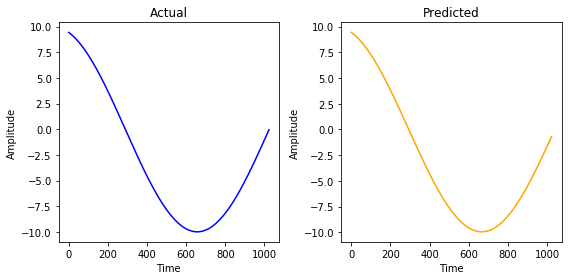

Mean absolute error: 0.6988979017828182
Root mean squared error: 0.8712655889472907


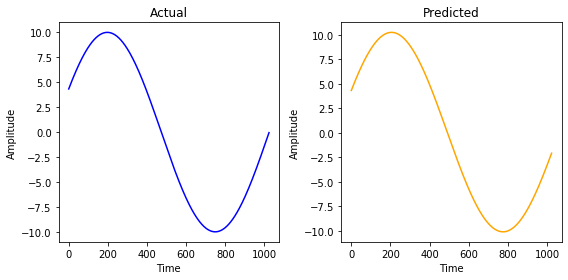

Mean absolute error: 0.20065596416653436
Root mean squared error: 0.26114067547501124


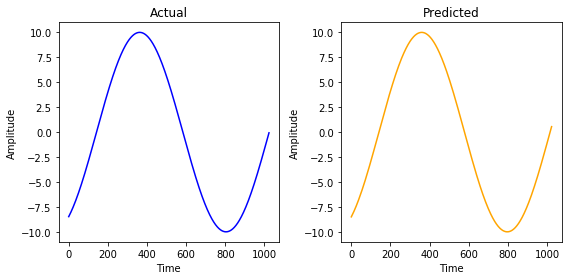

Mean absolute error: 0.6425428166238327
Root mean squared error: 0.7978699593674966


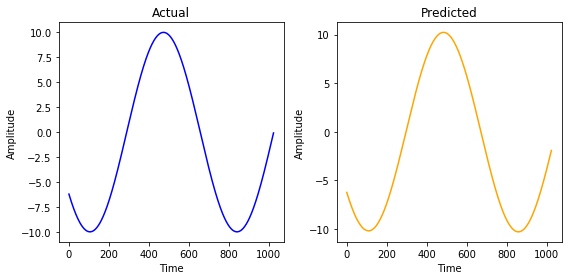

Mean absolute error: 0.029910860728931548
Root mean squared error: 0.0372573937669337


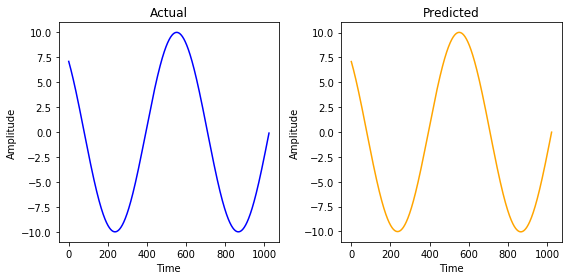

Mean absolute error: 0.37906049934765107
Root mean squared error: 0.4720198588269808


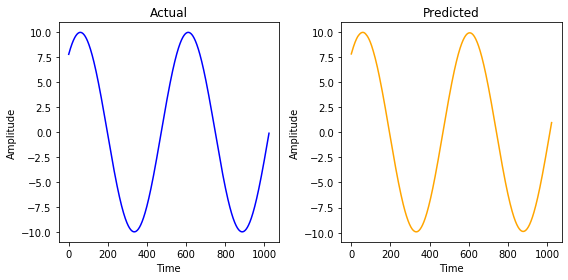

Mean absolute error: 0.10753395613288246
Root mean squared error: 0.13462748426976445


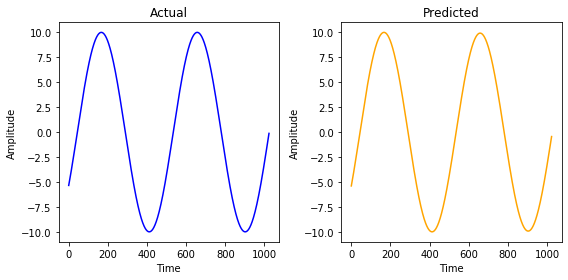

In [28]:
out_data = test_different_frequencies_waves(44100, 3, range(range_start, range_end, step), 10, [1024])

In [31]:
column_names =  ['Frecvența', 'Eșantioane prezise', 'Timp antrenare', 'Timp prezicere', 'Mean absolute error', 'Mean squared error', 'Root mean squared error']
df = pd.DataFrame(out_data, columns = column_names)

In [34]:
df.head()

Frecvența  Eșantioane prezise  Timp antrenare  Timp prezicere  \
0         10                1024        3.111471        0.015511   
1         20                1024        2.622619        0.020127   
2         30                1024        2.244435        0.012725   
3         40                1024        2.113632        0.015040   
4         50                1024        2.037871        0.014059   

   Mean absolute error  Mean squared error  Root mean squared error  
0             0.198708            0.063502                 0.251997  
1             2.991849           14.397171                 3.794360  
2             0.209313            0.071170                 0.266777  
3             0.698898            0.759104                 0.871266  
4             0.200656            0.068194                 0.261141

In [35]:
destination_path = f'../test-data/sine_tests/variable_frequency_{range_start}_{range_end}_{step}.pkl'

In [39]:
df.to_pickle(destination_path)

In [40]:
image_destination_path = f'../test-data/sine_tests/variable_frequency_{range_start}_{range_end}_{step}.png'

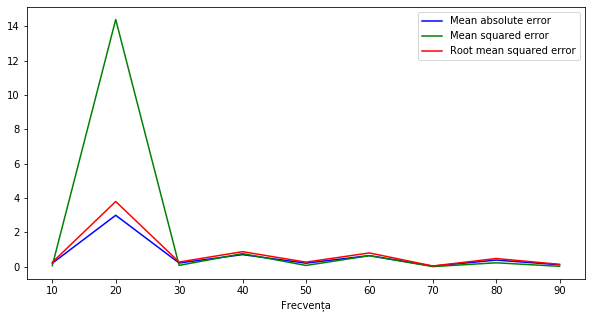

In [43]:
frequencies = np.array(df['Frecvența'])
mae  = np.array(df['Mean absolute error'])
mse = np.array(df['Mean squared error'])
rmse = np.array(df['Root mean squared error'])


fig, ax = plt.subplots(figsize=(10,5),sharex=True, )
ax.plot(frequencies, mae,'b', label='Mean absolute error')
ax.plot(frequencies, mse,'g', label='Mean squared error')
ax.plot(frequencies, rmse, 'r', label='Root mean squared error')
ax.set(xlabel='Frecvența')
ax.legend()
plt.savefig(image_destination_path)

## Range-ul de [100, 1000], step de 25.

In [ ]:
range_start = 100
range_end = 1001
step = 25
out_data = test_different_frequencies_waves(44100, 3, range(range_start, range_end, step), 10, [1024])
column_names =  ['Frecvența', 'Eșantioane prezise', 'Timp antrenare', 'Timp prezicere', 'Mean absolute error', 'Mean squared error', 'Root mean squared error']
df = pd.DataFrame(out_data, columns = column_names)

In [42]:
df.head()

Frecvența  Eșantioane prezise  Timp antrenare  Timp prezicere  \
0         10                1024        3.111471        0.015511   
1         20                1024        2.622619        0.020127   
2         30                1024        2.244435        0.012725   
3         40                1024        2.113632        0.015040   
4         50                1024        2.037871        0.014059   

   Mean absolute error  Mean squared error  Root mean squared error  
0             0.198708            0.063502                 0.251997  
1             2.991849           14.397171                 3.794360  
2             0.209313            0.071170                 0.266777  
3             0.698898            0.759104                 0.871266  
4             0.200656            0.068194                 0.261141

In [ ]:
destination_path = f'../test-data/sine_tests/variable_frequency_{range_start}_{range_end}_{step}.pkl'
df.to_pickle(destination_path)
image_destination_path = f'../test-data/sine_tests/variable_frequency_{range_start}_{range_end}_{step}.png'
frequencies = np.array(df['Frecvența'])
mae  = np.array(df['Mean absolute error'])
mse = np.array(df['Mean squared error'])
rmse = np.array(df['Root mean squared error'])


fig, ax = plt.subplots(figsize=(10,5),sharex=True, )
ax.plot(frequencies, mae,'b', label='Mean absolute error')
ax.plot(frequencies, mse,'g', label='Mean squared error')
ax.plot(frequencies, rmse, 'r', label='Root mean squared error')
ax.set(xlabel='Frecvența')
ax.legend()
plt.savefig(image_destination_path)

## Range-ul de [1000, 20000], step de 500.

In [ ]:
range_start = 1000
range_end = 20001
step = 250
out_data = test_different_frequencies_waves(44100, 3, range(range_start, range_end, step), 10, [1024])
column_names =  ['Frecvența', 'Eșantioane prezise', 'Timp antrenare', 'Timp prezicere', 'Mean absolute error', 'Mean squared error', 'Root mean squared error']
df = pd.DataFrame(out_data, columns = column_names)

In [ ]:
df.head()

In [ ]:
destination_path = f'../test-data/sine_tests/variable_frequency_{range_start}_{range_end}_{step}.pkl'
df.to_pickle(destination_path)
image_destination_path = f'../test-data/sine_tests/variable_frequency_{range_start}_{range_end}_{step}.png'
frequencies = np.array(df['Frecvența'])
mae  = np.array(df['Mean absolute error'])
mse = np.array(df['Mean squared error'])
rmse = np.array(df['Root mean squared error'])


fig, ax = plt.subplots(figsize=(10,5),sharex=True, )
ax.plot(frequencies, mae,'b', label='Mean absolute error')
ax.plot(frequencies, mse,'g', label='Mean squared error')
ax.plot(frequencies, rmse, 'r', label='Root mean squared error')
ax.set(xlabel='Frecvența')
ax.legend()
plt.savefig(image_destination_path)

# Amplitude dependant test

## Range-ul [10, 100], la un step de 10.

range(10, 101, 10)
Amplitude: 10
Mean absolute error: 1.311242710040624
Root mean squared error: 1.639022917185815


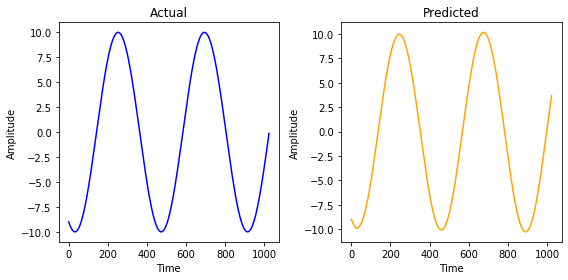

Amplitude: 20
Mean absolute error: 3.2377591088143864
Root mean squared error: 4.053496711435556


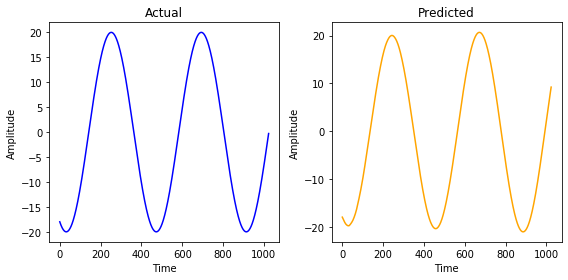

Amplitude: 30
Mean absolute error: 2.648514299873761
Root mean squared error: 3.3100300756311865


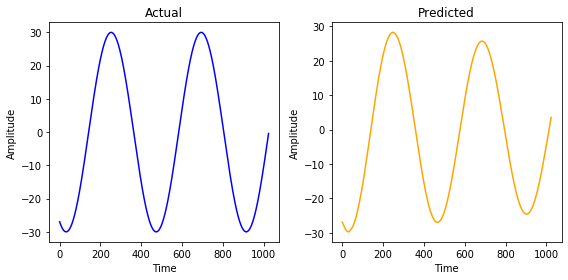

Amplitude: 40
Mean absolute error: 7.974101598911096
Root mean squared error: 9.969110981902547


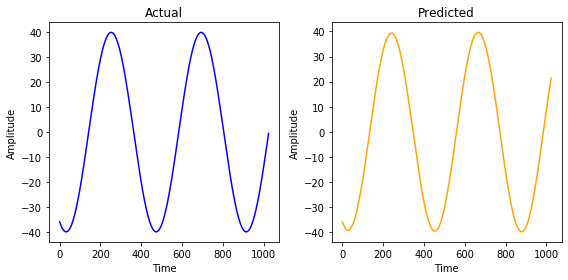

Amplitude: 50
Mean absolute error: 5.3538403143263285
Root mean squared error: 6.599581183079791


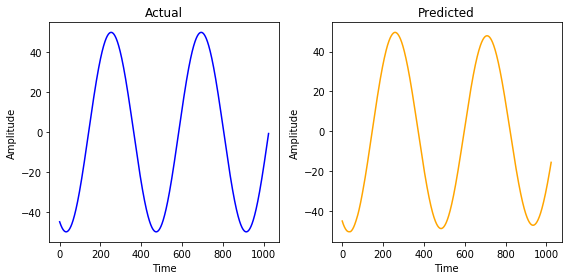

Amplitude: 60
Mean absolute error: 6.290337769094957
Root mean squared error: 7.842184415905306


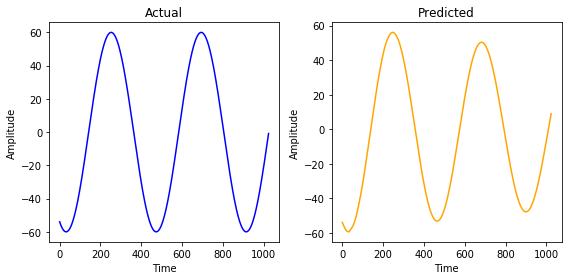

Amplitude: 70
Mean absolute error: 7.740984209845804
Root mean squared error: 9.661943497239974


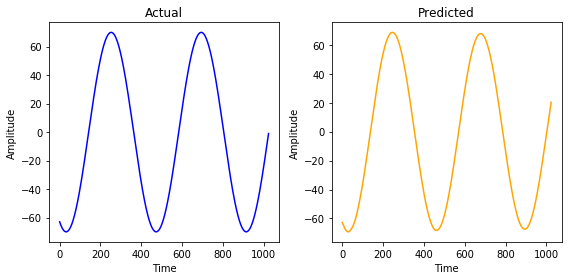

Amplitude: 80
Mean absolute error: 10.854818954774789
Root mean squared error: 13.565791158931377


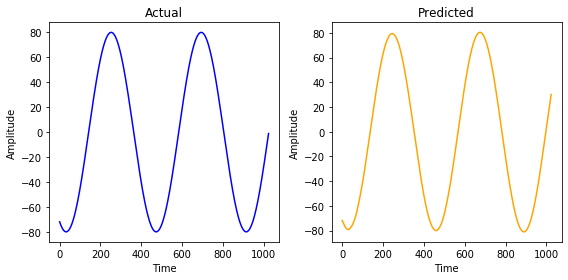

Amplitude: 90
Mean absolute error: 1.4337127577430917
Root mean squared error: 1.786729497866403


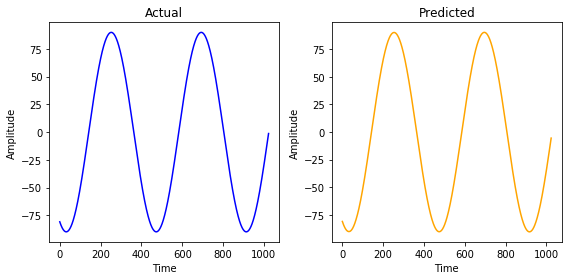

Amplitude: 100
Mean absolute error: 9.979580565659262
Root mean squared error: 12.332701739542937


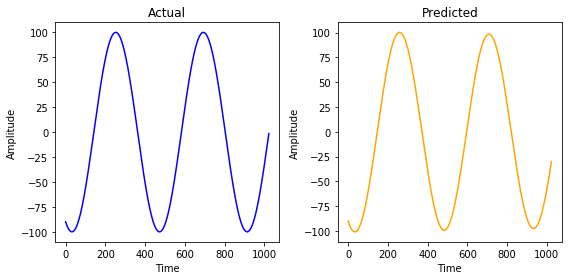

In [46]:
range_start = 10
range_end = 101
step = 10
out_data = test_different_amplitudes_waves(44100, 3, 100, range(range_start, range_end, step), [1024])
column_names =  ['Amplitudinea', 'Eșantioane prezise', 'Timp antrenare', 'Timp prezicere', 'Mean absolute error', 'Mean squared error', 'Root mean squared error']
df = pd.DataFrame(out_data, columns = column_names)

In [49]:
df.head()

Amplitudinea  Eșantioane prezise  Timp antrenare  Timp prezicere  \
0            10                1024        2.080880        0.011792   
1            20                1024        1.874441        0.011853   
2            30                1024        2.168952        0.012148   
3            40                1024        2.069015        0.011910   
4            50                1024        2.326285        0.014339   

   Mean absolute error  Mean squared error  Root mean squared error  
0             1.311243            2.686396                 1.639023  
1             3.237759           16.430836                 4.053497  
2             2.648514           10.956299                 3.310030  
3             7.974102           99.383174                 9.969111  
4             5.353840           43.554472                 6.599581

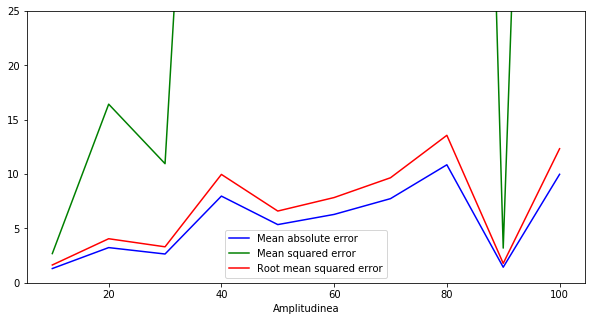

In [57]:
destination_path = f'../test-data/sine_tests/variable_amplitude_{range_start}_{range_end}_{step}.pkl'
df.to_pickle(destination_path)
image_destination_path = f'../test-data/sine_tests/variable_amplitude_{range_start}_{range_end}_{step}.png'
frequencies = np.array(df['Amplitudinea'])
mae  = np.array(df['Mean absolute error'])
mse = np.array(df['Mean squared error'])
rmse = np.array(df['Root mean squared error'])


fig, ax = plt.subplots(figsize=(10,5),sharex=True, )
ax.plot(frequencies, mae,'b', label='Mean absolute error')
ax.plot(frequencies, mse,'g', label='Mean squared error')
ax.plot(frequencies, rmse, 'r', label='Root mean squared error')
ax.set(xlabel='Amplitudinea')
ax.set_ylim([0, 25])
ax.legend()
plt.savefig(image_destination_path)

## Range-ul [100, 1000], la un step de 25.

In [ ]:
range_start = 100
range_end = 1001
step = 25
out_data = test_different_amplitudes_waves(44100, 3, 100, range(range_start, range_end, step), [1024])
column_names =  ['Amplitudinea', 'Eșantioane prezise', 'Timp antrenare', 'Timp prezicere', 'Mean absolute error', 'Mean squared error', 'Root mean squared error']
df = pd.DataFrame(out_data, columns = column_names)

In [51]:
df.head()

Amplitudinea  Eșantioane prezise  Timp antrenare  Timp prezicere  \
0            10                1024        2.080880        0.011792   
1            20                1024        1.874441        0.011853   
2            30                1024        2.168952        0.012148   
3            40                1024        2.069015        0.011910   
4            50                1024        2.326285        0.014339   

   Mean absolute error  Mean squared error  Root mean squared error  
0             1.311243            2.686396                 1.639023  
1             3.237759           16.430836                 4.053497  
2             2.648514           10.956299                 3.310030  
3             7.974102           99.383174                 9.969111  
4             5.353840           43.554472                 6.599581

In [ ]:
destination_path = f'../test-data/sine_tests/variable_amplitude_{range_start}_{range_end}_{step}.pkl'
df.to_pickle(destination_path)
image_destination_path = f'../test-data/sine_tests/variable_amplitude_{range_start}_{range_end}_{step}.png'
frequencies = np.array(df['Amplitudinea'])
mae  = np.array(df['Mean absolute error'])
mse = np.array(df['Mean squared error'])
rmse = np.array(df['Root mean squared error'])


fig, ax = plt.subplots(figsize=(10,5),sharex=True, )
ax.plot(frequencies, mae,'b', label='Mean absolute error')
ax.plot(frequencies, mse,'g', label='Mean squared error')
ax.plot(frequencies, rmse, 'r', label='Root mean squared error')
ax.set(xlabel='Amplitudinea')
ax.legend()
plt.savefig(image_destination_path)

# Frequency and Amplitude dependant test

## Both in the range [10, 100] with a step of 10.

In [61]:
range_start = 10
range_end = 101
step = 70

Mean absolute error: 0.1987076746341962
Root mean squared error: 0.2519965349576813


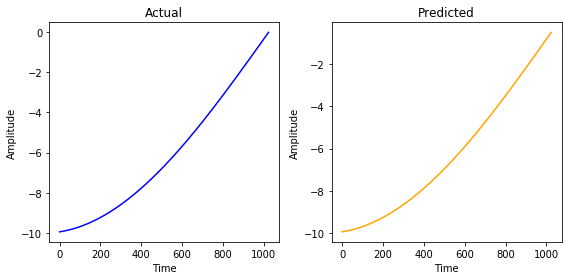

Mean absolute error: 1.3750550622656093
Root mean squared error: 1.7469056228114472


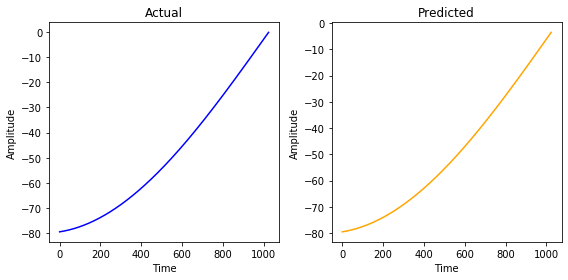

Mean absolute error: 0.37906049934765107
Root mean squared error: 0.4720198588269808


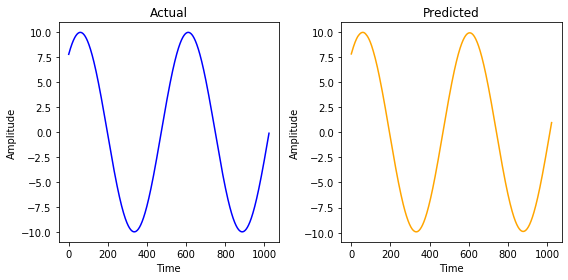

Mean absolute error: 4.022468994023298
Root mean squared error: 5.009228452915668


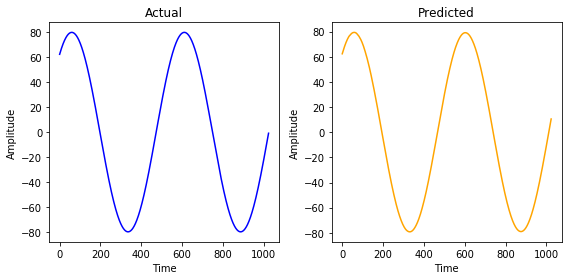

In [62]:
out_data  = test_different_freq_amp_waves(44100, 3,range(range_start, range_end, step), range(range_start, range_end, step), [1024])

In [63]:
column_names =  ['Frecvența', 'Amplitudinea', 'Eșantioane prezise', 'Timp antrenare', 'Timp prezicere', 'Mean absolute error', 'Mean squared error', 'Root mean squared error']
df = pd.DataFrame(out_data, columns = column_names)

In [66]:
df.head()

Frecvența  Amplitudinea  Eșantioane prezise  Timp antrenare  \
0         10            10                1024        2.520285   
1         10            80                1024        2.047792   
2         80            10                1024        2.178301   
3         80            80                1024        1.970780   

   Timp prezicere  Mean absolute error  Mean squared error  \
0        0.026496             0.198708            0.063502   
1        0.012447             1.375055            3.051679   
2        0.019618             0.379060            0.222803   
3        0.013998             4.022469           25.092370   

   Root mean squared error  
0                 0.251997  
1                 1.746906  
2                 0.472020  
3                 5.009228

In [67]:
destination_path = f'../test-data/sine_tests/variable_freq_amp_{range_start}_{range_end}_{step}.pkl'
df.to_pickle(destination_path)
image_destination_path = f'../test-data/sine_tests/variable_freq_amp_{range_start}_{range_end}_{step}.png'

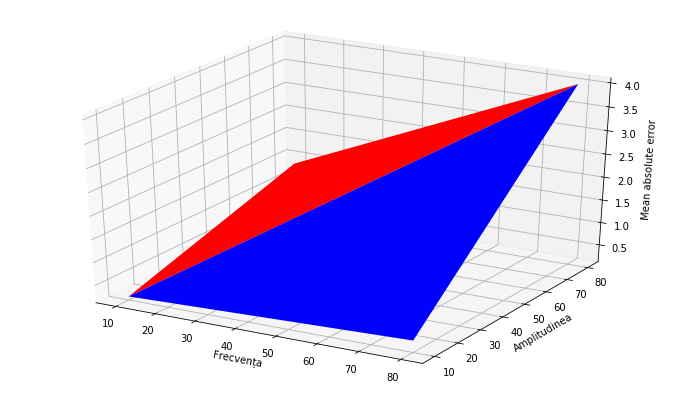

In [68]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = 12, 7

X = np.array(df['Frecvența'])
Y = np.array(df['Amplitudinea'])
Z = np.array(df['Mean absolute error'])

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.set(xlabel='Frecvența', ylabel = 'Amplitudinea', zlabel='Mean absolute error')
tr = ax.plot_trisurf(X, Y, Z, cmap='bwr', antialiased=True)


#ax.scatter(X, Y, Z, c=Z, cmap='BrBG', linewidth=1)
plt.savefig(image_destination_path)

## Both in the range [100, 1000] with a step of 25.

In [299]:
range_start = 100
range_end = 1001
step = 25

Mean absolute error: 9.979580565659262
Root mean squared error: 12.332701739542937


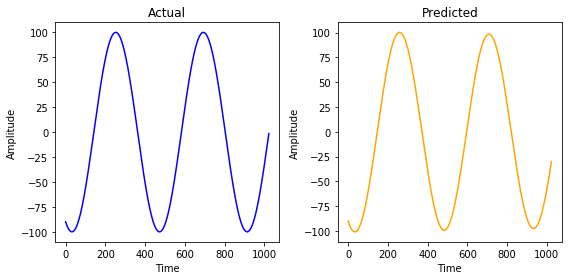

Mean absolute error: 4.423001511005252
Root mean squared error: 5.5487445717328825


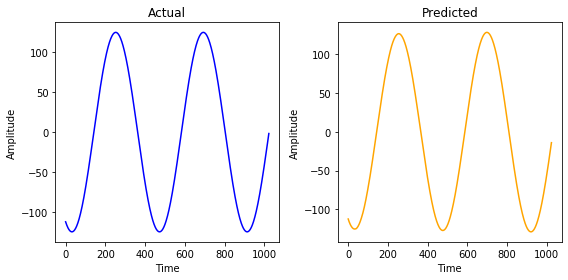

Mean absolute error: 24.33503813987888
Root mean squared error: 30.403809388888945


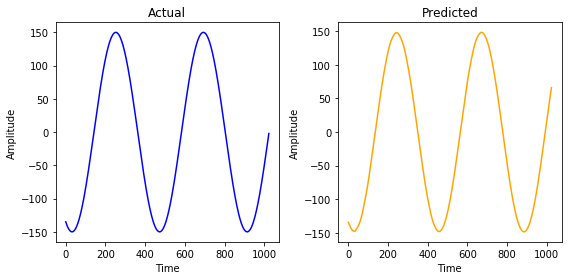

Mean absolute error: 1.067095718838288
Root mean squared error: 1.3569944671294656


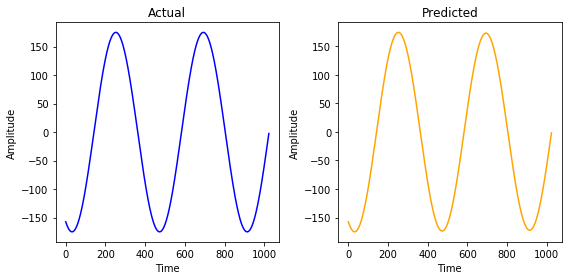

Mean absolute error: 21.572268809848506
Root mean squared error: 26.583159540275503


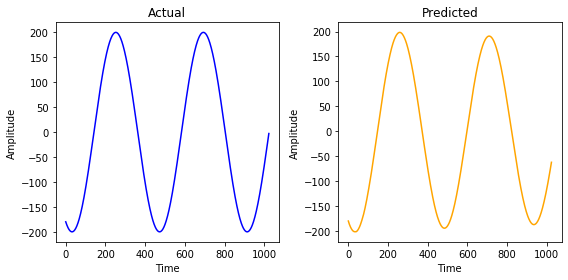

Mean absolute error: 43.063019023727854
Root mean squared error: 52.98964259570185


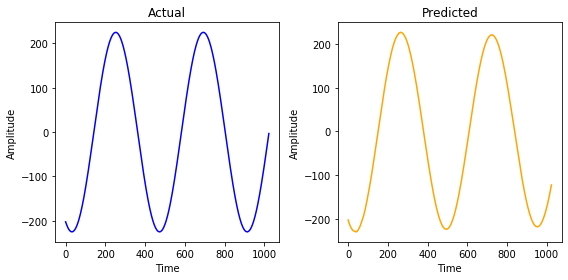

Mean absolute error: 2.9111863937492837
Root mean squared error: 3.6111845205511814


KeyboardInterrupt: 

In [301]:
out_data  = test_different_freq_amp_waves(44100, 3,range(range_start, range_end, step), range(range_start, range_end, step), [1024])
column_names =  ['Frecvența', 'Amplitudinea', 'Eșantioane prezise', 'Timp antrenare', 'Timp prezicere', 'Mean absolute error', 'Mean squared error', 'Root mean squared error']
df = pd.DataFrame(out_data, columns = column_names)

In [356]:
df.head()

NameError: name 'df' is not defined

In [ ]:
destination_path = f'../test-data/sine_tests/variable_freq_amp_{range_start}_{range_end}_{step}.pkl'
df.to_pickle(destination_path)
image_destination_path = f'../test-data/sine_tests/variable_freq_amp_{range_start}_{range_end}_{step}.png'

In [316]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = 12, 7

X = np.array(df['Frecvența'])
Y = np.array(df['Amplitudinea'])
Z = np.array(df['Mean absolute error'])

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.set(xlabel='Frecvența', ylabel = 'Amplitudinea', zlabel='Mean absolute error')
tr = ax.plot_trisurf(X, Y, Z, cmap='bwr', antialiased=True)


#ax.scatter(X, Y, Z, c=Z, cmap='BrBG', linewidth=1)
plt.savefig(image_destination_path)

NameError: name 'df' is not defined

# Quick check for frequency & amplitude difference conclusion

In [ ]:
sample_rate = 44100
frequency = 3
amplitude = 100
duration_in_seconds = 3
x, y = sine_wave(sample_rate, duration_in_seconds, frequency, amplitude)
plt.figure(figsize=(20, 10))
plt.xlabel('Timp (s)')
plt.ylabel('Amplitudine')
plt.plot(x,y)

In [ ]:
# train autoregression
start = timer()
model = AR(train)
end = timer()
print(end - start)
start = timer()
model_fit = model.fit()
end = timer()
print('Fit time: %.3f' % (end - start))
print('Lag: %s' % model_fit.k_ar)
print('Coefficients: %s' % model_fit.params)
# make predictions
start = timer()
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
end = timer()
print('Prediction time: %.3f' % (end - start))
ame = mean_squared_error(test, predictions)
mse = mean_squared_error(test, predictions)
rmse = np.sqrt(mse)
error = mean_squared_error(test, predictions)
print('Test MAE: %.3f ' % error)
print('Test RMSE: %.3f' % rmse)
# plot results
plt.plot(test, "-b", label="Semnalul real")
plt.plot(predictions, "-r", label="Semnalul prezis")
plt.legend(loc="upper left")
plt.savefig('../test-data/sine_tests/base.png')
plt.show()

In [367]:
df= pd.read_pickle('variable_freq_amp_100_1000_25.pkl')

In [370]:
df

Frecvența  Amplitudinea  Eșantioane prezise  Timp antrenare  \
0           100           100                1024        0.880924   
1           100           125                1024        0.904274   
2           100           150                1024        0.873126   
3           100           175                1024        0.909257   
4           100           200                1024        0.908562   
...         ...           ...                 ...             ...   
1291        975           875                1024        0.853655   
1292        975           900                1024        0.870056   
1293        975           925                1024        0.865204   
1294        975           950                1024        0.861829   
1295        975           975                1024        0.860512   

      Timp prezicere  Mean absolute error  Mean squared error  \
0           0.007613             9.979581          152.095532   
1           0.007662             4.423002           30.788566   
2           0.005920            24.335038          924.391625   
3           0.006560             1.067096            1.841434   
4           0.007113            21.572269          706.664371   
...              ...                  ...                 ...   
1291        0.007429             0.192702            0.059095   
1292        0.006278             0.066150            0.006948   
1293        0.007377             0.153283            0.037539   
1294        0.006154             0.120060            0.023001   
1295        0.006201             0.295407            0.139144   

      Root mean squared error  
0                   12.332702  
1                    5.548745  
2                   30.403809  
3                    1.356994  
4                   26.583160  
...                       ...  
1291                 0.243094  
1292                 0.083358  
1293                 0.193750  
1294                 0.151662  
1295                 0.373020  

[1296 rows x 8 columns]

In [371]:
np.mean(df['Timp antrenare'])

0.8886006686728367

In [372]:
np.mean(df['Timp prezicere'])

0.007041160879627928

NameError: name 'image_destination_path' is not defined

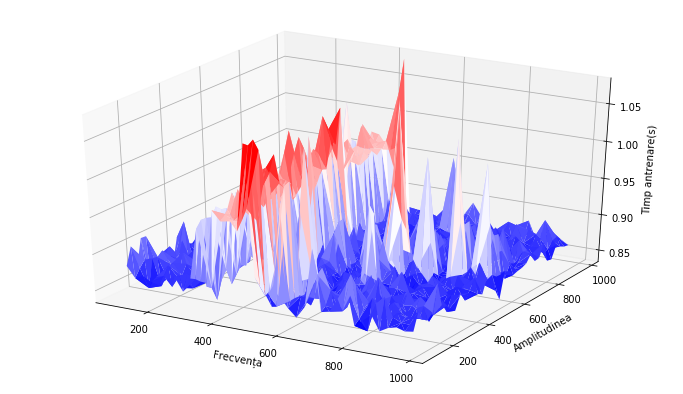

In [369]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = 12, 7

X = np.array(df['Frecvența'])
Y = np.array(df['Amplitudinea'])
Z = np.array(df['Timp antrenare'])

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.set(xlabel='Frecvența', ylabel = 'Amplitudinea', zlabel='Timp antrenare(s)')
tr = ax.plot_trisurf(X, Y, Z, cmap='bwr', antialiased=True)


#ax.scatter(X, Y, Z, c=Z, cmap='BrBG', linewidth=1)
plt.savefig('train_time ')